<h1><font color='blue'> 9E and 9F: Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 9E: Implementing Decision Function of SVM RBF Kernel</font></h2>

## Task E

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
X, Y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75)


In [4]:
clf = SVC(gamma=0.001,C=100,random_state=40)
clf.fit(x_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=40, shrinking=True, tol=0.001,
    verbose=False)

In [5]:
coef = clf.dual_coef_
intercept = clf.intercept_
sup_vec = clf.support_vectors_

In [6]:
from scipy.spatial.distance import euclidean as dis
def decision_function(x_cv,sup_vec,coef,intercept):
    decision_func = np.empty([len(x_cv)])
    svc_cv = 0
    for i in range(len(x_cv)):
        for j in range(len(sup_vec)):
            norm2 = dis(sup_vec[j], x_cv[i])
            k = np.exp(-0.001*(norm2)**2)
            svc_cv = svc_cv + k*coef[0][j]          
        svc_cv = svc_cv + intercept
        decision_func[i] = svc_cv
        svc_cv = 0
    return decision_func

f_cv = decision_function(x_cv,sup_vec,coef,intercept)
f_cv

array([-2.06932705, -2.97957569,  1.1216874 , -3.90431688,  1.63790498,
        1.96799592, -2.09420855, -2.28786989, -2.13308921, -2.48357816,
       -3.28361541, -3.57152208,  1.32800151,  0.74846448, -3.3801008 ,
       -1.6191872 , -1.7823078 , -2.8288933 , -0.78401522, -3.71704033,
        2.2395755 , -1.94338163, -0.2953605 ,  1.16886926, -3.80875349,
        1.27750275, -2.94947912, -2.04978745, -1.29130696, -2.76122313,
       -2.75888067,  1.09761495, -1.73561427, -2.98446684,  2.0221618 ,
       -2.5791056 , -1.44487294, -1.49111144, -2.98994612,  1.1620855 ,
       -0.2310674 , -3.03369243, -2.24271167, -3.25444044, -3.365773  ,
       -2.63917841, -1.33861982, -1.97674966, -3.11725889, -1.37064923,
       -0.91460046,  1.65209323, -3.37069738, -1.47753115, -0.86414908,
       -0.70937241, -1.80220694,  1.8073967 , -1.47342066,  1.90237311,
       -1.70076638, -0.25177819, -2.8499464 , -4.09521053, -3.35562578,
       -2.6392789 , -2.26248054,  0.50140177, -2.15974867, -1.60

In [7]:
svm_dec_f = clf.decision_function(x_cv)
svm_dec_f

array([-2.06932705, -2.97957569,  1.1216874 , -3.90431688,  1.63790498,
        1.96799592, -2.09420855, -2.28786989, -2.13308921, -2.48357816,
       -3.28361541, -3.57152208,  1.32800151,  0.74846448, -3.3801008 ,
       -1.6191872 , -1.7823078 , -2.8288933 , -0.78401522, -3.71704033,
        2.2395755 , -1.94338163, -0.2953605 ,  1.16886926, -3.80875349,
        1.27750275, -2.94947912, -2.04978745, -1.29130696, -2.76122313,
       -2.75888067,  1.09761495, -1.73561427, -2.98446684,  2.0221618 ,
       -2.5791056 , -1.44487294, -1.49111144, -2.98994612,  1.1620855 ,
       -0.2310674 , -3.03369243, -2.24271167, -3.25444044, -3.365773  ,
       -2.63917841, -1.33861982, -1.97674966, -3.11725889, -1.37064923,
       -0.91460046,  1.65209323, -3.37069738, -1.47753115, -0.86414908,
       -0.70937241, -1.80220694,  1.8073967 , -1.47342066,  1.90237311,
       -1.70076638, -0.25177819, -2.8499464 , -4.09521053, -3.35562578,
       -2.6392789 , -2.26248054,  0.50140177, -2.15974867, -1.60

<h2><font color='Geen'> 9F: Implementing Platt Scaling to find P(Y==1|X)</font></h2>

## TASK F

In [8]:
unique,count = np.unique(y_train,return_counts=True)
counts = dict(zip(unique,count))

In [9]:
#considering 1 as positive value
y_pos = (count[1] + 1)/(count[1]+2)
y_neg = 1/(count[0] + 2)
print('y_pos',y_pos)
print('y_neg',y_neg)

y_pos 0.9988938053097345
y_neg 0.0004761904761904762


In [10]:
idx = 0
updated_y_cv = np.empty(len(y_cv))
for i in y_cv:
    if i == 1:
        updated_y_cv[idx] = y_pos
        idx += 1
    else:
        updated_y_cv[idx] = y_neg
        idx += 1
           

In [11]:
#initializing weight vector 
w_vec = np.zeros_like(f_cv[0])
# initializing bias 
bias = 0
#initializing regularizier
eta0  = 0.0001
#initializing learning rate
alpha = 0.0001

In [12]:
def sig_func(x,w,b):
    z = (np.dot(x,w.T) + b)
    return 1 / (1 + np.exp(-z))

In [16]:
def loss_func(updated_y_cv):
    q = len(updated_y_cv)
    sum_log = 0
    print('w_vec',w_vec) 
    print('bias',bias)
    for p in range(q):
        sum_log += updated_y_cv[p]* np.log(sig_func(f_cv[p],w_vec,bias)) - (1 - updated_y_cv[p]) * np.log(1 - sig_func(f_cv[p],w_vec,bias))
    return -1*sum_log/q

In [17]:
epochs = 10
loss = []
N = len(f_cv)
for i in range(epochs):
    for j in range(len(f_cv)):
        w_vec = ((alpha*f_cv[j]*(y_cv[j] - sig_func(f_cv[j],w_vec,bias))) + (1- ((alpha*eta0)/N))*w_vec)
        bias = bias + (alpha*(y_cv[j] - sig_func(f_cv[j],w_vec,bias)))
    
    
    l = loss_func(updated_y_cv)
    loss.append(l)
    print('loss value ',loss[i])
    print(' ')
    print('*'*5,'loss after {} epochs'.format(i+ 1),'*'*5)    
    print(' ')

w_vec 0.601551494886538
bias -0.11056894978423781
loss value  0.03282659452711211
 
***** loss after 1 epochs *****
 
w_vec 0.6313516026279627
bias -0.11454838314419143
loss value  0.027106188953790734
 
***** loss after 2 epochs *****
 
w_vec 0.6592496188404567
bias -0.11810320813567278
loss value  0.0221480689089729
 
***** loss after 3 epochs *****
 
w_vec 0.6854629260821863
bias -0.12128845648825358
loss value  0.01781544092629371
 
***** loss after 4 epochs *****
 
w_vec 0.7101741564566585
bias -0.12414995497378767
loss value  0.014001581254725032
 
***** loss after 5 epochs *****
 
w_vec 0.733538073341598
bias -0.12672618218374276
loss value  0.010622172195556598
 
***** loss after 6 epochs *****
 
w_vec 0.7556868700390351
bias -0.12904969533885866
loss value  0.00760982692761311
 
***** loss after 7 epochs *****
 
w_vec 0.7767342917430773
bias -0.13114823755062455
loss value  0.004910118727537277
 
***** loss after 8 epochs *****
 
w_vec 0.7967788740814215
bias -0.13304560532338

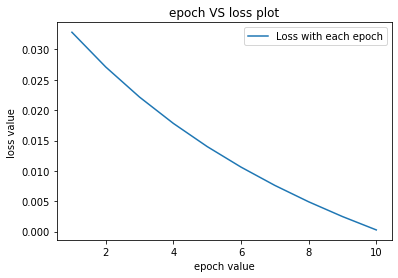

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs_list = [1,2,3,4,5,6,7,8,9,10]
plt.plot(epochs_list,loss, label='Loss with each epoch')
plt.title('epoch VS loss plot')
plt.xlabel('epoch value')
plt.ylabel('loss value ')
plt.legend()
plt.show()

In [19]:
print('weights',w_vec)
print('bias',bias)

weights 0.815906511721317
bias -0.13476233442989385


In [22]:
a_test = decision_function(x_test,sup_vec,coef,intercept)
a_test.reshape(-1,1)[:10]

array([[-0.99818631],
       [ 0.24358752],
       [-2.2832153 ],
       [ 0.28701185],
       [-4.73116099],
       [-3.6684952 ],
       [-1.26797903],
       [ 1.00363116],
       [-3.36179304],
       [-2.95670996]])

In [21]:
test = []
for k in range(len(x_test)):
    value = sig_func(a_test[k],w_vec,bias)
    test.append(value)   

test[:10]    

[0.279047941465723,
 0.515990122653107,
 0.11944960786424905,
 0.5248326766808601,
 0.018075670314786883,
 0.04197050483450362,
 0.2369788808558762,
 0.6646546894266814,
 0.053268459406239206,
 0.07261742698628659]